#  advanced performance evaluation 
**1. Dataset simulation:** We’ll create an imbalanced classification dataset to mimic disease prediction.\
**2. Stratified sampling:** We’ll split the data using train_test_split with stratification.\
**3. Oversampling:** We’ll use SMOTE to balance the classes.\
**4. VC dimension concept:** We’ll illustrate with simple classifiers and discuss their complexity (e.g., Logistic Regression vs. SVM).\
**5. k-Fold cross-validation:** We’ll apply StratifiedKFold with cross-validation to estimate metrics like accuracy and mean absolute error (MAE).\
**6. Custom performance analysis:** We’ll compare results before and after oversampling to see the real impact.

*Let’s build this in Python step-by-step with scikit-learn, imbalanced-learn, and matplotlib for a full, runnable experience.*

Dataset shape: (569, 30)
Class distribution: 1    357
0    212
Name: count, dtype: int64 (0=malignant, 1=benign)

Dataset sample:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980   

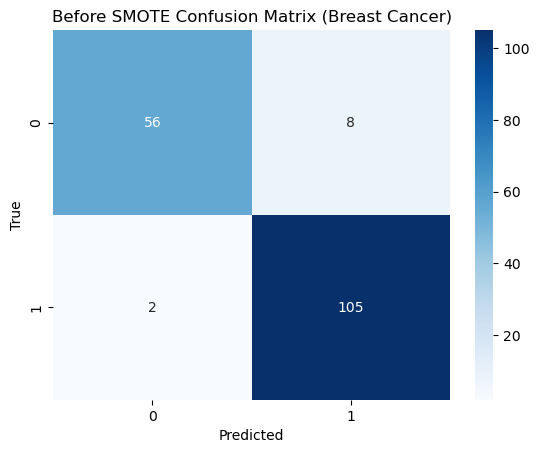

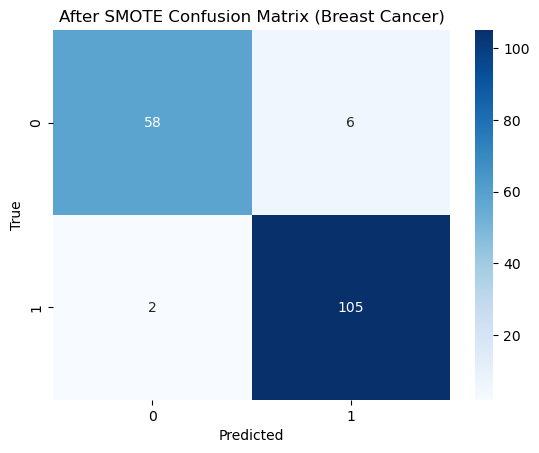


SVM (RBF Kernel) Performance (High VC Dimension)
[[54 10]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        64
           1       0.91      0.92      0.91       107

    accuracy                           0.89       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171


Sample Predictions Comparison:
   LogReg (Original)  LogReg (SMOTE)  SVM (RBF)
0                  0               0          1
1                  1               1          1
2                  1               1          1
3                  0               0          0
4                  1               1          1
5                  0               0          0
6                  1               1          1
7                  0               0          0
8                  1               1          1
9                  0               0          0


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_absolute_error,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the real Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {pd.Series(y).value_counts()} (0=malignant, 1=benign)")

# Convert to DataFrame for clarity (optional)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("\nDataset sample:")
print(df.head())

# 2. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print(f"\nTrain class distribution: {pd.Series(y_train).value_counts()}")
print(f"Test class distribution: {pd.Series(y_test).value_counts()}")

# 3. Train a baseline logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nBaseline Performance (Before Oversampling)")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# 4. Apply SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE class distribution: {pd.Series(y_train_smote).value_counts()}")

# Train a model on the balanced dataset
model_smote = LogisticRegression(solver='liblinear', random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Predictions and evaluation
y_pred_smote = model_smote.predict(X_test)
print("\nPerformance After Oversampling (SMOTE)")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

# Mean Absolute Error after SMOTE
mae_smote = mean_absolute_error(y_test, y_pred_smote)
print(f"Mean Absolute Error (SMOTE): {mae_smote:.4f}")

# 5. k-Fold Cross-Validation (Stratified)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model_smote, X, y, cv=skf, scoring='accuracy')
print(f"\n10-Fold Cross-Validation Accuracy Scores: {scores}")
print(f"Mean CV Accuracy: {np.mean(scores):.4f}")

# 6. Plot the confusion matrix for visual comparison
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred, "Before SMOTE Confusion Matrix (Breast Cancer)")
plot_conf_matrix(y_test, y_pred_smote, "After SMOTE Confusion Matrix (Breast Cancer)")

# VC Dimension Note
# Logistic Regression: low VC dimension (linear)
# SVM with RBF kernel: high VC dimension (non-linear)

from sklearn.svm import SVC

# Train a high VC dimension model (SVM with RBF kernel)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
print("\nSVM (RBF Kernel) Performance (High VC Dimension)")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# 7. Bonus: Compare all models side by side
results = pd.DataFrame({
    'LogReg (Original)': y_pred,
    'LogReg (SMOTE)': y_pred_smote,
    'SVM (RBF)': y_pred_svm
}, index=np.arange(len(y_test)))

print("\nSample Predictions Comparison:")
print(results.head(10))

# Integrate the Breast Cancer Wisconsin dataset 
### (a classic imbalanced binary classification problem) from scikit-learn’s built-in datasets.
**This dataset:**\
	• **Target:** Classifies breast cancer tumors as malignant (1) or benign (0).\
	• **Slight imbalance:** Usually around ~37% malignant vs ~63% benign, a nice real-world setup for stratified sampling + oversampling.

*We’ll keep the same pipeline but swap in the real dataset and refine the analysis.*

Original class distribution: 0    900
1    100
Name: count, dtype: int64
Train class distribution: 0    630
1     70
Name: count, dtype: int64
Test class distribution: 0    270
1     30
Name: count, dtype: int64

Baseline Performance (Before Oversampling)
[[270   0]
 [  6  24]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       270
           1       1.00      0.80      0.89        30

    accuracy                           0.98       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.98      0.98      0.98       300

Mean Absolute Error: 0.0200

After SMOTE class distribution: 0    630
1    630
Name: count, dtype: int64

Performance After Oversampling (SMOTE)
[[254  16]
 [  3  27]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       270
           1       0.63      0.90      0.74        30

    accuracy                           0.94       300
   macro

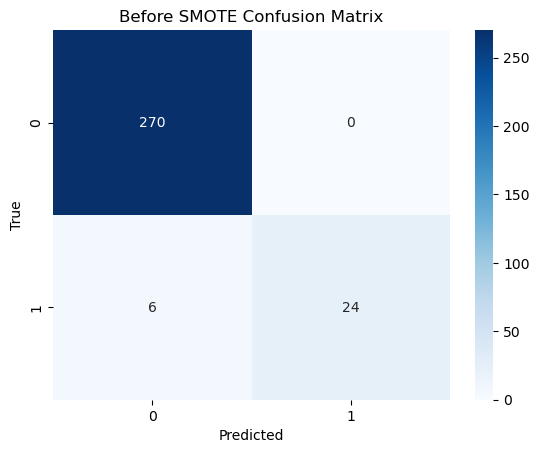

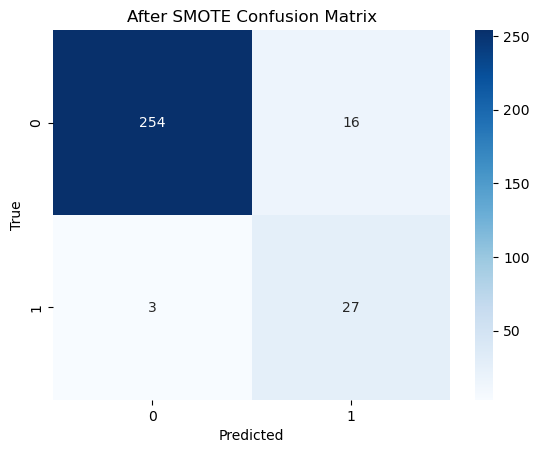


SVM (RBF Kernel) Performance (High VC Dimension)
[[264   6]
 [  4  26]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       270
           1       0.81      0.87      0.84        30

    accuracy                           0.97       300
   macro avg       0.90      0.92      0.91       300
weighted avg       0.97      0.97      0.97       300


Sample Predictions Comparison:
   LogReg (Original)  LogReg (SMOTE)  SVM (RBF)
0                  0               0          0
1                  0               0          0
2                  0               0          0
3                  0               0          0
4                  0               0          0
5                  0               0          0
6                  0               0          0
7                  0               0          0
8                  0               0          0
9                  0               0          0


In [8]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_absolute_error,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate an imbalanced dataset (simulate rare disease / fraud detection)
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    flip_y=0,
    random_state=42
)

print(f"Original class distribution: {pd.Series(y).value_counts()}")

# 2. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print(f"Train class distribution: {pd.Series(y_train).value_counts()}")
print(f"Test class distribution: {pd.Series(y_test).value_counts()}")

# 3. Train a baseline logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nBaseline Performance (Before Oversampling)")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# 4. Apply SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE class distribution: {pd.Series(y_train_smote).value_counts()}")

# Train a model on the balanced dataset
model_smote = LogisticRegression(solver='liblinear', random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Predictions and evaluation
y_pred_smote = model_smote.predict(X_test)
print("\nPerformance After Oversampling (SMOTE)")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

# Mean Absolute Error after SMOTE
mae_smote = mean_absolute_error(y_test, y_pred_smote)
print(f"Mean Absolute Error (SMOTE): {mae_smote:.4f}")

# 5. k-Fold Cross-Validation (Stratified)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model_smote, X, y, cv=skf, scoring='accuracy')
print(f"\n10-Fold Cross-Validation Accuracy Scores: {scores}")
print(f"Mean CV Accuracy: {np.mean(scores):.4f}")

# 6. Plot the confusion matrix for visual comparison
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred, "Before SMOTE Confusion Matrix")
plot_conf_matrix(y_test, y_pred_smote, "After SMOTE Confusion Matrix")

# VC Dimension Note
# Logistic Regression (linear classifier): low VC dimension (simple)
# SVM with RBF kernel: high VC dimension (complex)
# We'll quickly show the difference

from sklearn.svm import SVC

# Train a high VC dimension model (SVM with RBF kernel)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
print("\nSVM (RBF Kernel) Performance (High VC Dimension)")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# 7. Bonus: Compare all models side by side
results = pd.DataFrame({
    'LogReg (Original)': y_pred,
    'LogReg (SMOTE)': y_pred_smote,
    'SVM (RBF)': y_pred_svm
}, index=np.arange(len(y_test)))

print("\nSample Predictions Comparison:")
print(results.head(10))

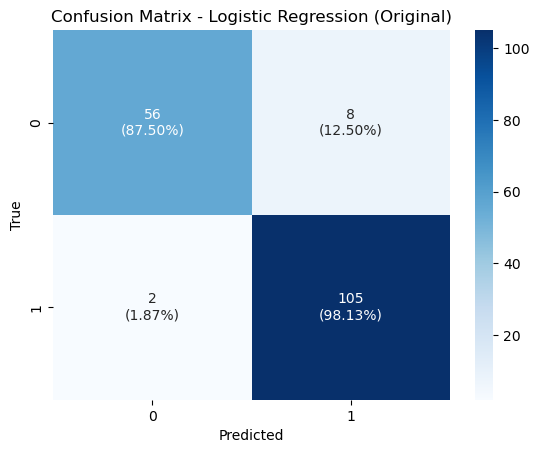

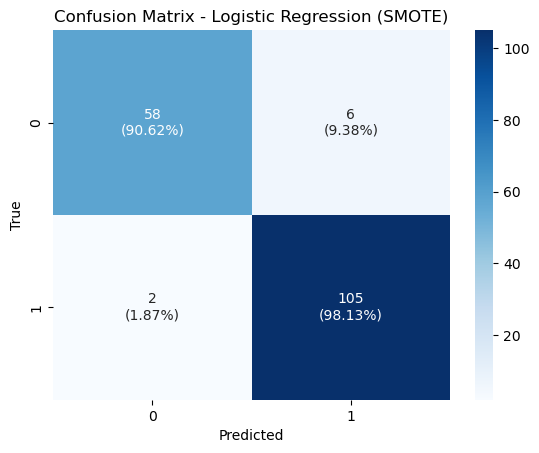

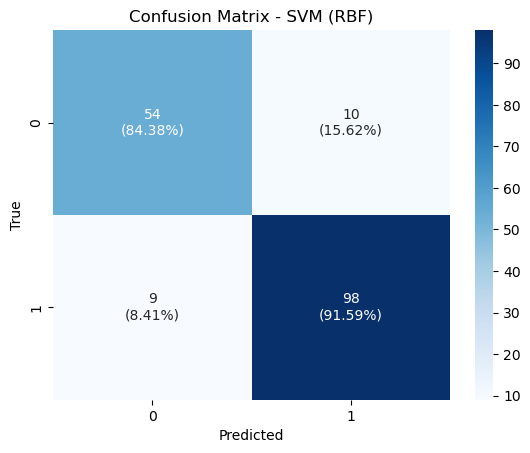

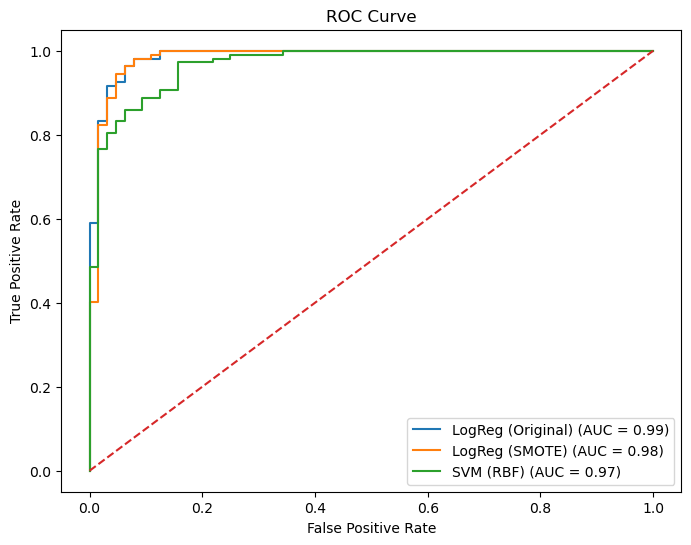

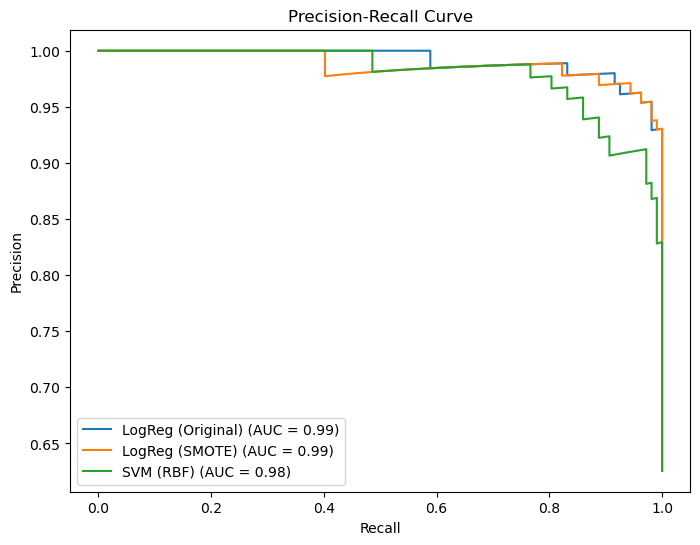

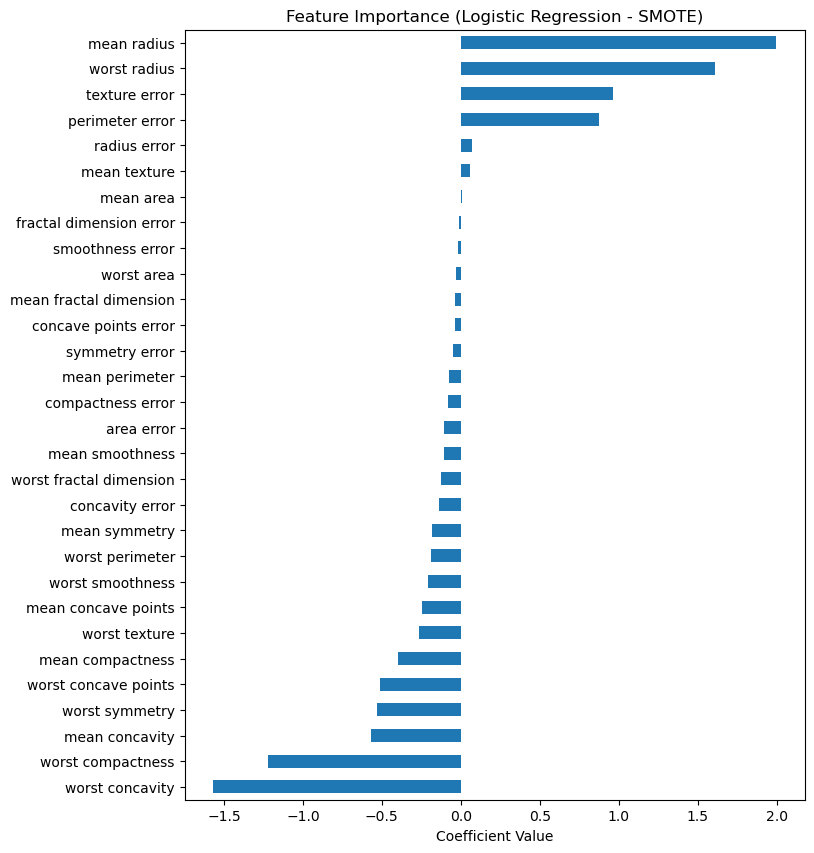


LogReg (Original)
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        64
           1       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC-ROC: 0.9870
Mean Absolute Error: 0.0585

LogReg (SMOTE)
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

AUC-ROC: 0.9839
Mean Absolute Error: 0.0468

SVM (RBF)
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        64
           1       0.91      0.92      0.91       107

    accuracy                           0.89     

In [12]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_absolute_error,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    auc
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert to DataFrame for clarity
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# 3. Apply SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Train logistic regression (baseline and SMOTE)
logreg_orig = LogisticRegression(solver='liblinear', random_state=42)
logreg_smote = LogisticRegression(solver='liblinear', random_state=42)

logreg_orig.fit(X_train, y_train)
logreg_smote.fit(X_train_smote, y_train_smote)

# Predictions and Probabilities
y_pred_orig = logreg_orig.predict(X_test)
y_pred_smote = logreg_smote.predict(X_test)
y_prob_orig = logreg_orig.predict_proba(X_test)[:, 1]
y_prob_smote = logreg_smote.predict_proba(X_test)[:, 1]

# 5. Train high VC dimension model (SVM with RBF)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# 6. Function: Advanced Confusion Matrix Plot
def plot_advanced_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_norm[i, j]
            annot[i, j] = f'{c}\n({p:.2%})'
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# 7. Plot Confusion Matrices
plot_advanced_conf_matrix(y_test, y_pred_orig, "Confusion Matrix - Logistic Regression (Original)")
plot_advanced_conf_matrix(y_test, y_pred_smote, "Confusion Matrix - Logistic Regression (SMOTE)")
plot_advanced_conf_matrix(y_test, y_pred_svm, "Confusion Matrix - SVM (RBF)")

# 8. ROC Curve Plot
def plot_roc(y_test, probs_list, labels):
    plt.figure(figsize=(8,6))
    for probs, label in zip(probs_list, labels):
        fpr, tpr, _ = roc_curve(y_test, probs)
        auc_score = roc_auc_score(y_test, probs)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc(
    y_test,
    [y_prob_orig, y_prob_smote, y_prob_svm],
    ['LogReg (Original)', 'LogReg (SMOTE)', 'SVM (RBF)']
)

# 9. Precision-Recall Curve Plot
def plot_precision_recall(y_test, probs_list, labels):
    plt.figure(figsize=(8,6))
    for probs, label in zip(probs_list, labels):
        precision, recall, _ = precision_recall_curve(y_test, probs)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

plot_precision_recall(
    y_test,
    [y_prob_orig, y_prob_smote, y_prob_svm],
    ['LogReg (Original)', 'LogReg (SMOTE)', 'SVM (RBF)']
)

# 10. Feature Importance for Logistic Regression (SMOTE)
coefs = pd.Series(logreg_smote.coef_[0], index=feature_names).sort_values()
plt.figure(figsize=(8, 10))
coefs.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression - SMOTE)")
plt.xlabel("Coefficient Value")
plt.show()

# Print performance reports and AUC scores
for name, y_pred, y_prob in [
    ('LogReg (Original)', y_pred_orig, y_prob_orig),
    ('LogReg (SMOTE)', y_pred_smote, y_prob_smote),
    ('SVM (RBF)', y_pred_svm, y_prob_svm)
]:
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.4f}")

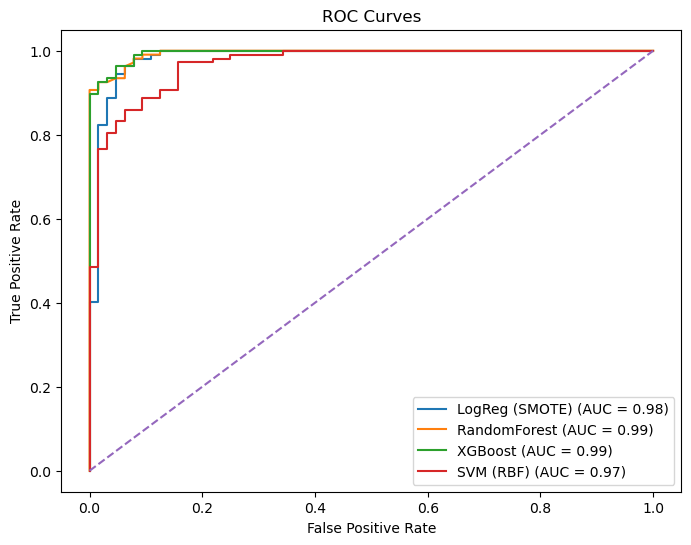

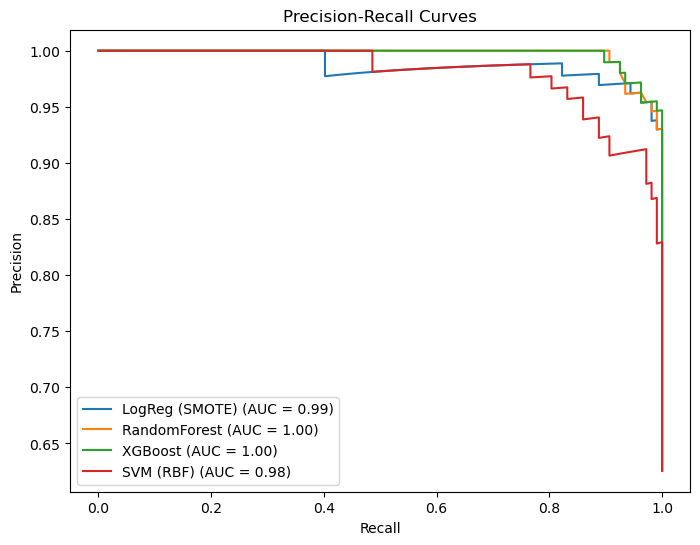


Threshold Tuning: Logistic Regression (SMOTE)
    Threshold  Sensitivity (Recall)  Specificity  Precision
0        0.10              1.000000     0.859375   0.922414
1        0.15              1.000000     0.875000   0.930435
2        0.20              1.000000     0.875000   0.930435
3        0.25              0.990654     0.875000   0.929825
4        0.30              0.990654     0.875000   0.929825
5        0.35              0.981308     0.890625   0.937500
6        0.40              0.981308     0.890625   0.937500
7        0.45              0.981308     0.890625   0.937500
8        0.50              0.981308     0.906250   0.945946
9        0.55              0.981308     0.921875   0.954545
10       0.60              0.971963     0.921875   0.954128
11       0.65              0.971963     0.921875   0.954128
12       0.70              0.943925     0.937500   0.961905
13       0.75              0.934579     0.953125   0.970874
14       0.80              0.915888     0.953125   0.

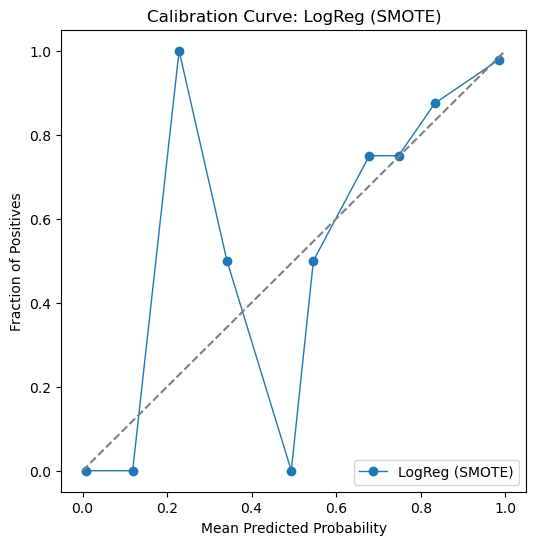

LogReg (SMOTE) - Brier Score: 0.0361


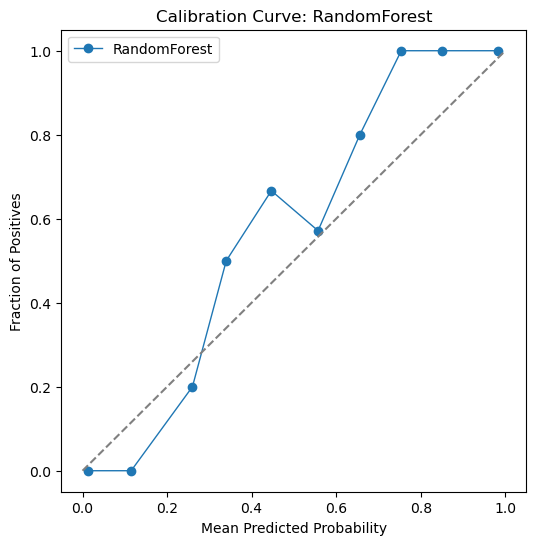

RandomForest - Brier Score: 0.0346


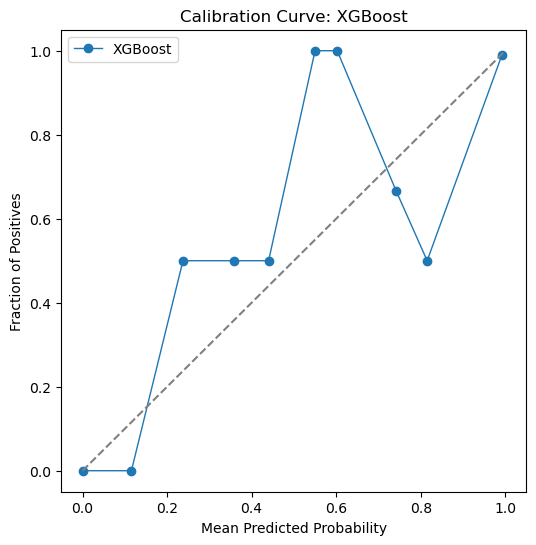

XGBoost - Brier Score: 0.0278


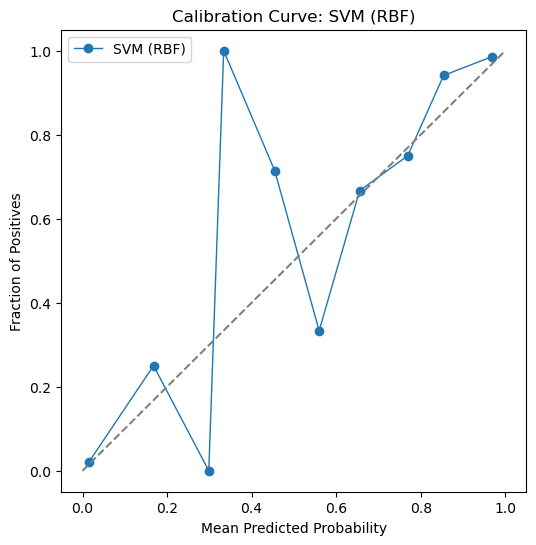

SVM (RBF) - Brier Score: 0.0695

LogReg (SMOTE)
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

AUC-ROC: 0.9839

RandomForest
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC-ROC: 0.9942

XGBoost
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96  

In [20]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    brier_score_loss
)
from sklearn.calibration import calibration_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Train-test split + SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Define models
models = {
    "LogReg (SMOTE)": LogisticRegression(solver='liblinear', random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42)
}

# 4. Train models + predict probabilities
probabilities = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    probabilities[name] = y_prob
    predictions[name] = y_pred

# 5. Plot ROC curves with AUC
plt.figure(figsize=(8,6))
for name, y_prob in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 6. Plot Precision-Recall curves
plt.figure(figsize=(8,6))
for name, y_prob in probabilities.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# 7. Threshold tuning function
def threshold_tuning(y_true, y_prob, thresholds=np.arange(0.1, 0.9, 0.05)):
    results = []
    for thresh in thresholds:
        y_pred_thresh = (y_prob >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresh).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        results.append({
            'Threshold': thresh,
            'Sensitivity (Recall)': sensitivity,
            'Specificity': specificity,
            'Precision': precision
        })
    df_results = pd.DataFrame(results)
    print(df_results)
    return df_results

# 8. Tune thresholds for best balance (LogReg as example)
print("\nThreshold Tuning: Logistic Regression (SMOTE)")
logreg_thresh_results = threshold_tuning(y_test, probabilities['LogReg (SMOTE)'])

# 9. Calibration plot function
def plot_calibration(y_true, y_prob, name):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)
    plt.figure(figsize=(6,6))
    plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=name)
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title(f'Calibration Curve: {name}')
    plt.legend()
    plt.show()
    brier = brier_score_loss(y_true, y_prob)
    print(f"{name} - Brier Score: {brier:.4f}")

# 10. Plot calibration curves
for name, y_prob in probabilities.items():
    plot_calibration(y_test, y_prob, name)

# 11. Print classification reports (default 0.5 threshold)
for name, y_pred in predictions.items():
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    auc_score = roc_auc_score(y_test, probabilities[name])
    print(f"AUC-ROC: {auc_score:.4f}")